In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
df['_HSCD'] = df['HSCD'].copy()

In [6]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,104,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,124,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [7]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [8]:
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


<AxesSubplot:>

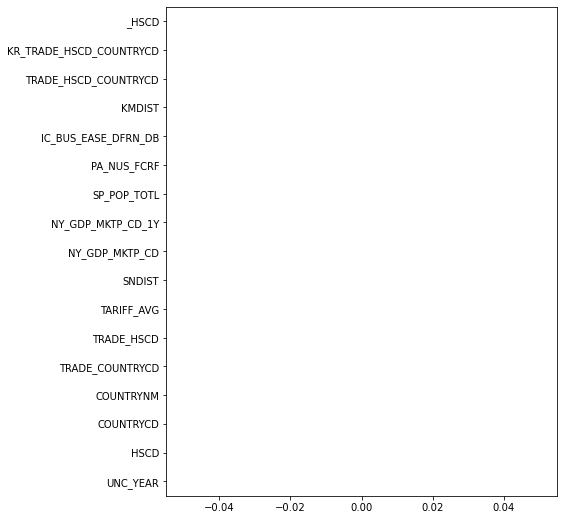

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,...,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590,0.007418,0.017537,106.355199,0.224130
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,...,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590,0.192061,2.252181,109.954916,1.206797
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,...,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590,0.020783,0.160822,114.876093,0.392121
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,...,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590,0.066283,0.065509,102.622089,4.945077
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,...,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893


In [13]:
copy_df = df.copy()

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,30.0,38.782384,0.027670,110.973017,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,2,0.0,122.031560,0.015534,1.304758,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
4,1,3,18.0,96.442069,0.147996,3.191389,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121
5,1,4,5.0,58.916600,0.036340,1360.358707,42.671390,37.961426,0.066283,0.065509,102.622089,4.945077
6,1,5,0.0,79.117838,0.024167,1.297936,79.540940,106.177031,0.257627,5.718352,107.959483,0.652893


In [16]:
df.to_csv('./norm.csv')

In [17]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [19]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [20]:
y_test = y_test.reshape(-1,1)

In [21]:
len(df)

17269

In [22]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [23]:
# RNN Model Test
import torch.nn as nn

class SingleRNN(nn.Module):

    def __init__(self, input_size, hidden_size, dropout=0, bidirectional=False):
        super(SingleRNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_direction = int(bidirectional) + 1
        self.rnn = LSTM(input_size, hidden_size, 1, dropout=dropout, batch_first=True, bidirectional=bidirectional)

    def forward(self, input):
        # input shape: batch, seq, dim
        output = input
        rnn_output, _ = self.rnn(output)
        return rnn_output
deepmodel = SingleRNN(df.shape[1]-1, 256).to(device)
deepmodel.eval()
# https://velog.io/@sjinu/Pytorch-Implementation-code

NameError: name 'LSTM' is not defined

In [30]:
class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.dropout1 = nn.Dropout(0.5)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.dropout2 = nn.Dropout(0.5)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = self.dropout1(x)
    x = F.relu(self.bn2(self.layer2(x)))
    x = self.dropout2(x)
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [31]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

# L2 Loss model

In [ ]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

# l1 loss model

In [27]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [28]:
n_epochs = 10
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel2(x_train).to(device)
    cost = F.l1_loss(y_train, pred)
    loss_list.append(cost)
    with torch.no_grad():
        pred_y = deepmodel2(x_test)
        test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
    optimizer2.zero_grad()
    cost.backward()
    optimizer2.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/10  Batch 1/216  cost : 43.596614837646484
Ep 0/10  Batch 2/216  cost : 54.78651809692383
Ep 0/10  Batch 3/216  cost : 84.31104278564453
Ep 0/10  Batch 4/216  cost : 46.153358459472656
Ep 0/10  Batch 5/216  cost : 39.08290100097656
Ep 0/10  Batch 6/216  cost : 18.980876922607422
Ep 0/10  Batch 7/216  cost : 10.124605178833008
Ep 0/10  Batch 8/216  cost : 11.464462280273438
Ep 0/10  Batch 9/216  cost : 19.215129852294922
Ep 0/10  Batch 10/216  cost : 14.057833671569824
Ep 0/10  Batch 11/216  cost : 14.987260818481445
Ep 0/10  Batch 12/216  cost : 6.127131462097168
Ep 0/10  Batch 13/216  cost : 7.178795337677002
Ep 0/10  Batch 14/216  cost : 9.693578720092773
Ep 0/10  Batch 15/216  cost : 18.250505447387695
Ep 0/10  Batch 16/216  cost : 13.454724311828613
Ep 0/10  Batch 17/216  cost : 12.42834186553955
Ep 0/10  Batch 18/216  cost : 10.558771133422852
Ep 0/10  Batch 19/216  cost : 8.325604438781738
Ep 0/10  Batch 20/216  cost : 6.805007457733154
Ep 0/10  Batch 21/216  cost : 8.862482

Ep 0/10  Batch 212/216  cost : 7.694399833679199
Ep 0/10  Batch 213/216  cost : 4.608412265777588
Ep 0/10  Batch 214/216  cost : 3.823202610015869
Ep 0/10  Batch 215/216  cost : 4.838305473327637
Ep 0/10  Batch 216/216  cost : 9.368124961853027
Ep 1/10  Batch 1/216  cost : 6.750065326690674
Ep 1/10  Batch 2/216  cost : 11.700730323791504
Ep 1/10  Batch 3/216  cost : 4.079424858093262
Ep 1/10  Batch 4/216  cost : 3.223212242126465
Ep 1/10  Batch 5/216  cost : 21.249309539794922
Ep 1/10  Batch 6/216  cost : 10.75814437866211
Ep 1/10  Batch 7/216  cost : 8.990854263305664
Ep 1/10  Batch 8/216  cost : 20.019630432128906
Ep 1/10  Batch 9/216  cost : 10.166446685791016
Ep 1/10  Batch 10/216  cost : 6.282986640930176
Ep 1/10  Batch 11/216  cost : 5.356721878051758
Ep 1/10  Batch 12/216  cost : 3.546121835708618
Ep 1/10  Batch 13/216  cost : 7.209578514099121
Ep 1/10  Batch 14/216  cost : 10.188410758972168
Ep 1/10  Batch 15/216  cost : 1.7179300785064697
Ep 1/10  Batch 16/216  cost : 3.594198

Ep 1/10  Batch 209/216  cost : 2.618345260620117
Ep 1/10  Batch 210/216  cost : 4.630358695983887
Ep 1/10  Batch 211/216  cost : 4.84078311920166
Ep 1/10  Batch 212/216  cost : 4.5600056648254395
Ep 1/10  Batch 213/216  cost : 3.381946086883545
Ep 1/10  Batch 214/216  cost : 4.139995574951172
Ep 1/10  Batch 215/216  cost : 5.414762496948242
Ep 1/10  Batch 216/216  cost : 28.19696044921875
Ep 2/10  Batch 1/216  cost : 3.650665044784546
Ep 2/10  Batch 2/216  cost : 4.269994258880615
Ep 2/10  Batch 3/216  cost : 4.167769432067871
Ep 2/10  Batch 4/216  cost : 6.156844139099121
Ep 2/10  Batch 5/216  cost : 5.6339545249938965
Ep 2/10  Batch 6/216  cost : 3.7777516841888428
Ep 2/10  Batch 7/216  cost : 5.1089067459106445
Ep 2/10  Batch 8/216  cost : 8.18860149383545
Ep 2/10  Batch 9/216  cost : 4.5068159103393555
Ep 2/10  Batch 10/216  cost : 4.159911155700684
Ep 2/10  Batch 11/216  cost : 6.264547348022461
Ep 2/10  Batch 12/216  cost : 2.7876596450805664
Ep 2/10  Batch 13/216  cost : 4.40522

Ep 2/10  Batch 206/216  cost : 6.392355918884277
Ep 2/10  Batch 207/216  cost : 4.588737964630127
Ep 2/10  Batch 208/216  cost : 6.0068359375
Ep 2/10  Batch 209/216  cost : 8.18910026550293
Ep 2/10  Batch 210/216  cost : 4.044567108154297
Ep 2/10  Batch 211/216  cost : 4.386987686157227
Ep 2/10  Batch 212/216  cost : 5.538238525390625
Ep 2/10  Batch 213/216  cost : 7.053288459777832
Ep 2/10  Batch 214/216  cost : 5.422079086303711
Ep 2/10  Batch 215/216  cost : 22.324134826660156
Ep 2/10  Batch 216/216  cost : 4.040171146392822
Ep 3/10  Batch 1/216  cost : 4.679291248321533
Ep 3/10  Batch 2/216  cost : 6.140665054321289
Ep 3/10  Batch 3/216  cost : 4.526124000549316
Ep 3/10  Batch 4/216  cost : 16.14742088317871
Ep 3/10  Batch 5/216  cost : 4.206158638000488
Ep 3/10  Batch 6/216  cost : 3.433018922805786
Ep 3/10  Batch 7/216  cost : 7.243682861328125
Ep 3/10  Batch 8/216  cost : 3.03566312789917
Ep 3/10  Batch 9/216  cost : 5.490793228149414
Ep 3/10  Batch 10/216  cost : 3.755949735641

Ep 3/10  Batch 202/216  cost : 4.957968235015869
Ep 3/10  Batch 203/216  cost : 5.612040042877197
Ep 3/10  Batch 204/216  cost : 44.36326217651367
Ep 3/10  Batch 205/216  cost : 2.6970438957214355
Ep 3/10  Batch 206/216  cost : 7.168737888336182
Ep 3/10  Batch 207/216  cost : 10.8289155960083
Ep 3/10  Batch 208/216  cost : 7.606328964233398
Ep 3/10  Batch 209/216  cost : 12.440244674682617
Ep 3/10  Batch 210/216  cost : 4.4050517082214355
Ep 3/10  Batch 211/216  cost : 4.265373229980469
Ep 3/10  Batch 212/216  cost : 6.292788028717041
Ep 3/10  Batch 213/216  cost : 7.3869829177856445
Ep 3/10  Batch 214/216  cost : 3.8735694885253906
Ep 3/10  Batch 215/216  cost : 4.951834201812744
Ep 3/10  Batch 216/216  cost : 2.5965523719787598
Ep 4/10  Batch 1/216  cost : 11.078736305236816
Ep 4/10  Batch 2/216  cost : 4.465356349945068
Ep 4/10  Batch 3/216  cost : 4.659829616546631
Ep 4/10  Batch 4/216  cost : 6.318498611450195
Ep 4/10  Batch 5/216  cost : 4.65213680267334
Ep 4/10  Batch 6/216  cos

Ep 4/10  Batch 198/216  cost : 4.893503189086914
Ep 4/10  Batch 199/216  cost : 4.584362983703613
Ep 4/10  Batch 200/216  cost : 3.137094020843506
Ep 4/10  Batch 201/216  cost : 2.817413330078125
Ep 4/10  Batch 202/216  cost : 6.427618980407715
Ep 4/10  Batch 203/216  cost : 5.521704196929932
Ep 4/10  Batch 204/216  cost : 4.88830041885376
Ep 4/10  Batch 205/216  cost : 10.029098510742188
Ep 4/10  Batch 206/216  cost : 2.6238389015197754
Ep 4/10  Batch 207/216  cost : 3.455881118774414
Ep 4/10  Batch 208/216  cost : 5.527801036834717
Ep 4/10  Batch 209/216  cost : 2.950303554534912
Ep 4/10  Batch 210/216  cost : 5.418537139892578
Ep 4/10  Batch 211/216  cost : 4.670900344848633
Ep 4/10  Batch 212/216  cost : 4.7775163650512695
Ep 4/10  Batch 213/216  cost : 2.883197784423828
Ep 4/10  Batch 214/216  cost : 11.913235664367676
Ep 4/10  Batch 215/216  cost : 2.7482407093048096
Ep 4/10  Batch 216/216  cost : 4.60830545425415
Ep 5/10  Batch 1/216  cost : 2.688537359237671
Ep 5/10  Batch 2/21

Ep 5/10  Batch 194/216  cost : 5.119643211364746
Ep 5/10  Batch 195/216  cost : 5.937396049499512
Ep 5/10  Batch 196/216  cost : 8.21219253540039
Ep 5/10  Batch 197/216  cost : 7.314008712768555
Ep 5/10  Batch 198/216  cost : 4.167420864105225
Ep 5/10  Batch 199/216  cost : 5.505589485168457
Ep 5/10  Batch 200/216  cost : 8.384429931640625
Ep 5/10  Batch 201/216  cost : 5.581756114959717
Ep 5/10  Batch 202/216  cost : 4.72862434387207
Ep 5/10  Batch 203/216  cost : 6.561148643493652
Ep 5/10  Batch 204/216  cost : 6.790029525756836
Ep 5/10  Batch 205/216  cost : 6.640225410461426
Ep 5/10  Batch 206/216  cost : 8.890493392944336
Ep 5/10  Batch 207/216  cost : 5.525027751922607
Ep 5/10  Batch 208/216  cost : 10.020269393920898
Ep 5/10  Batch 209/216  cost : 4.657339572906494
Ep 5/10  Batch 210/216  cost : 23.59185791015625
Ep 5/10  Batch 211/216  cost : 4.530828475952148
Ep 5/10  Batch 212/216  cost : 5.808209419250488
Ep 5/10  Batch 213/216  cost : 4.307620048522949
Ep 5/10  Batch 214/21

Ep 6/10  Batch 190/216  cost : 5.082686901092529
Ep 6/10  Batch 191/216  cost : 4.287205696105957
Ep 6/10  Batch 192/216  cost : 4.895302772521973
Ep 6/10  Batch 193/216  cost : 4.301119804382324
Ep 6/10  Batch 194/216  cost : 3.7955939769744873
Ep 6/10  Batch 195/216  cost : 4.73075008392334
Ep 6/10  Batch 196/216  cost : 2.871272087097168
Ep 6/10  Batch 197/216  cost : 5.819821834564209
Ep 6/10  Batch 198/216  cost : 3.8392717838287354
Ep 6/10  Batch 199/216  cost : 4.362722396850586
Ep 6/10  Batch 200/216  cost : 2.769259214401245
Ep 6/10  Batch 201/216  cost : 2.855386257171631
Ep 6/10  Batch 202/216  cost : 6.780787467956543
Ep 6/10  Batch 203/216  cost : 6.170078277587891
Ep 6/10  Batch 204/216  cost : 6.181151390075684
Ep 6/10  Batch 205/216  cost : 5.028162002563477
Ep 6/10  Batch 206/216  cost : 6.295849800109863
Ep 6/10  Batch 207/216  cost : 3.61514949798584
Ep 6/10  Batch 208/216  cost : 4.693986892700195
Ep 6/10  Batch 209/216  cost : 5.249591827392578
Ep 6/10  Batch 210/2

Ep 7/10  Batch 185/216  cost : 4.296005725860596
Ep 7/10  Batch 186/216  cost : 6.074163913726807
Ep 7/10  Batch 187/216  cost : 4.6816182136535645
Ep 7/10  Batch 188/216  cost : 7.747343063354492
Ep 7/10  Batch 189/216  cost : 5.000568866729736
Ep 7/10  Batch 190/216  cost : 5.856402397155762
Ep 7/10  Batch 191/216  cost : 3.641002655029297
Ep 7/10  Batch 192/216  cost : 6.166848182678223
Ep 7/10  Batch 193/216  cost : 3.9363107681274414
Ep 7/10  Batch 194/216  cost : 4.650722503662109
Ep 7/10  Batch 195/216  cost : 54.85083770751953
Ep 7/10  Batch 196/216  cost : 7.927370071411133
Ep 7/10  Batch 197/216  cost : 2.4399502277374268
Ep 7/10  Batch 198/216  cost : 6.838625431060791
Ep 7/10  Batch 199/216  cost : 9.603105545043945
Ep 7/10  Batch 200/216  cost : 7.5787811279296875
Ep 7/10  Batch 201/216  cost : 4.5872344970703125
Ep 7/10  Batch 202/216  cost : 3.9183528423309326
Ep 7/10  Batch 203/216  cost : 4.222703456878662
Ep 7/10  Batch 204/216  cost : 2.973247766494751
Ep 7/10  Batch

Ep 8/10  Batch 180/216  cost : 12.785877227783203
Ep 8/10  Batch 181/216  cost : 9.615277290344238
Ep 8/10  Batch 182/216  cost : 14.260513305664062
Ep 8/10  Batch 183/216  cost : 4.823275566101074
Ep 8/10  Batch 184/216  cost : 5.158049583435059
Ep 8/10  Batch 185/216  cost : 4.843432426452637
Ep 8/10  Batch 186/216  cost : 6.035296440124512
Ep 8/10  Batch 187/216  cost : 6.091611862182617
Ep 8/10  Batch 188/216  cost : 5.497161388397217
Ep 8/10  Batch 189/216  cost : 4.6235809326171875
Ep 8/10  Batch 190/216  cost : 3.2400853633880615
Ep 8/10  Batch 191/216  cost : 6.216508388519287
Ep 8/10  Batch 192/216  cost : 4.935006141662598
Ep 8/10  Batch 193/216  cost : 6.084800720214844
Ep 8/10  Batch 194/216  cost : 4.336874961853027
Ep 8/10  Batch 195/216  cost : 4.032244682312012
Ep 8/10  Batch 196/216  cost : 3.600029468536377
Ep 8/10  Batch 197/216  cost : 4.785955905914307
Ep 8/10  Batch 198/216  cost : 3.7512094974517822
Ep 8/10  Batch 199/216  cost : 7.227675914764404
Ep 8/10  Batch 

Ep 9/10  Batch 174/216  cost : 4.3105268478393555
Ep 9/10  Batch 175/216  cost : 57.80316162109375
Ep 9/10  Batch 176/216  cost : 7.163847923278809
Ep 9/10  Batch 177/216  cost : 4.466658592224121
Ep 9/10  Batch 178/216  cost : 3.715134382247925
Ep 9/10  Batch 179/216  cost : 10.582412719726562
Ep 9/10  Batch 180/216  cost : 4.765872955322266
Ep 9/10  Batch 181/216  cost : 3.7442033290863037
Ep 9/10  Batch 182/216  cost : 3.6299004554748535
Ep 9/10  Batch 183/216  cost : 5.342966079711914
Ep 9/10  Batch 184/216  cost : 3.0260748863220215
Ep 9/10  Batch 185/216  cost : 2.679388999938965
Ep 9/10  Batch 186/216  cost : 2.604881763458252
Ep 9/10  Batch 187/216  cost : 3.5880744457244873
Ep 9/10  Batch 188/216  cost : 4.787961959838867
Ep 9/10  Batch 189/216  cost : 3.8765740394592285
Ep 9/10  Batch 190/216  cost : 3.681079149246216
Ep 9/10  Batch 191/216  cost : 6.577083110809326
Ep 9/10  Batch 192/216  cost : 5.807895183563232
Ep 9/10  Batch 193/216  cost : 5.534731388092041
Ep 9/10  Batc

In [32]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(5.7879, device='cuda:0', grad_fn=<MeanBackward0>)

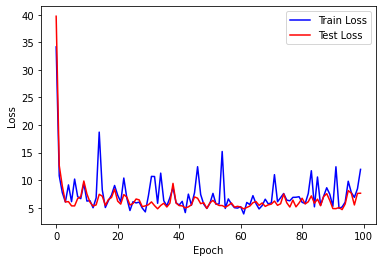

In [33]:
# loss_l = [(loss_list[i*10] - mi)/(ma - mi) for i in range(int(len(loss_list)/10))]
import numpy as np
count = 100
# loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(10000) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 100]


loss_l = [loss_list[i].item() for i in range(count)]
loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 1000]


loss_test_l = [test_loss_list[i].item() for i in range(count)]
loss_test_l = [np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) < 1000]

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot([i for i in range(len(loss_l))],loss_l, 'blue', label='Train Loss')
plt.plot([i for i in range(len(test_loss_list))][:count],loss_test_l, 'red', label='Test Loss')
plt.legend(loc='upper right')
plt.show()





In [ ]:
loss_l

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

# train Fin

# L1 case Start

In [35]:
torch.set_printoptions(sci_mode=False)

In [25]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [26]:
pred_y = deepmodel(x_test)

In [27]:
pred_y.shape

torch.Size([3454, 1])

In [28]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[    0.0005],
        [    0.1658],
        [    0.0533],
        ...,
        [    0.4124],
        [    0.2739],
        [    6.8481]], device='cuda:0')

In [29]:
pred_y.mean()

tensor(2.6136, device='cuda:0', grad_fn=<MeanBackward0>)

In [30]:
torch.mean(torch.abs(pred_y - y_test))

tensor(4.6064, device='cuda:0', grad_fn=<MeanBackward0>)

# test Field

In [107]:
abs(pred_y - y_test).min()

tensor(0.0028, device='cuda:0', grad_fn=<MinBackward1>)

In [121]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,3]

16908                    Iran
16910                   Japan
16911              Kazakhstan
16912                  Kuwait
16913                Malaysia
                 ...         
21098    United Arab Emirates
21099                  Turkey
21100                   Egypt
21101          United Kingdom
21102                     USA
Name: COUNTRYNM, Length: 3454, dtype: object

In [126]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [127]:
arr[:10]

[(6.287664413452148,
  6.284905910491943,
  0.002758502960205078,
  1991093839.0,
  125193297,
  'China',
  840890),
 (0.8550779223442078,
  0.8579413890838623,
  0.002863466739654541,
  16243198.0,
  138892,
  'Brazil',
  820320),
 (2.068004608154297,
  2.0750229358673096,
  0.007018327713012695,
  70528230.0,
  1458527,
  'Australia',
  840734),
 (4.616559982299805,
  4.60947847366333,
  0.007081508636474609,
  39207961.0,
  1810059,
  'Philippines',
  840999),
 (0.4036012887954712,
  0.3961523771286011,
  0.007448911666870117,
  73649172.0,
  297249,
  'Chile',
  841391),
 (1.0005733966827393,
  1.0106834173202515,
  0.010110020637512207,
  9238703.0,
  92440,
  'Poland',
  842119),
 (0.6981349587440491,
  0.6872860193252563,
  0.010848939418792725,
  153437531.0,
  1071201,
  'Norway',
  844399),
 (1.3283586502075195,
  1.3403414487838745,
  0.01198279857635498,
  156652117.0,
  2080902,
  'Poland',
  841459),
 (0.6548638343811035,
  0.6396098136901855,
  0.015254020690917969,
  65

In [128]:
arr[-10:]

[(92.46986389160156,
  3.7928061485290527,
  88.67705774307251,
  118502639.0,
  109579232,
  'India',
  842890),
 (102.65850830078125,
  2.5956149101257324,
  100.06289339065552,
  1833623.0,
  1882370,
  'Egypt',
  830230),
 (113.88651275634766,
  8.58624267578125,
  105.3002700805664,
  4900496.0,
  5581004,
  'Viet Nam',
  830710),
 (129.18777465820312,
  12.101070404052734,
  117.08670425415039,
  3011877.0,
  3890977,
  'Iran',
  843120),
 (150.64239501953125,
  4.030820369720459,
  146.6115746498108,
  2653403.0,
  3997150,
  'Kuwait',
  840890),
 (157.72268676757812,
  1.2415977716445923,
  156.48108899593353,
  590215.0,
  930903,
  'Brazil',
  845011),
 (170.12669372558594,
  8.675579071044922,
  161.45111465454102,
  5700485.0,
  9698047,
  'Viet Nam',
  820559),
 (278.2258605957031,
  2.667330503463745,
  275.5585300922394,
  22335305.0,
  62142596,
  'Saudi Arabia',
  841990),
 (364.4615783691406,
  1.538909912109375,
  362.92266845703125,
  4853256.0,
  17688253,
  'Myanm

In [106]:
copy_df.iloc[tr+te:,14:16]

,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
16908,6.592452e+07,300
16910,3.942546e+09,6534855
16911,4.830666e+07,25746
16912,1.047815e+08,99868
16913,2.689531e+08,489257
...,...,...
21098,2.198576e+06,19131
21099,1.687525e+06,43073
21100,1.708002e+06,7043
21101,3.555955e+07,97397


In [141]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [142]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [144]:
res_df[:].to_csv('./pred_result.csv')

In [143]:
res_df.head()

,percentage - Ground Truth,percentage - Prediction,Diff - Ground Truth & Prediction,previous - trade price,next - trade price,Country,Item Code
0,6.287664,6.284906,0.002759,1.991094e+09,125193297,China,840890
1,0.855078,0.857941,0.002863,1.624320e+07,138892,Brazil,820320
2,2.068005,2.075023,0.007018,7.052823e+07,1458527,Australia,840734
3,4.616560,4.609478,0.007082,3.920796e+07,1810059,Philippines,840999
4,0.403601,0.396152,0.007449,7.364917e+07,297249,Chile,841391


In [159]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [157]:
res_df.iloc[:10, :]

,percentage - Ground Truth,percentage - Prediction,Diff - Ground Truth & Prediction,previous - trade price,next - trade price,Country,Item Code
0,6.287664,6.284906,0.002759,1.991094e+09,125193297,China,840890
1,0.855078,0.857941,0.002863,1.624320e+07,138892,Brazil,820320
2,2.068005,2.075023,0.007018,7.052823e+07,1458527,Australia,840734
3,4.616560,4.609478,0.007082,3.920796e+07,1810059,Philippines,840999
4,0.403601,0.396152,0.007449,7.364917e+07,297249,Chile,841391
5,1.000573,1.010683,0.010110,9.238703e+06,92440,Poland,842119
6,0.698135,0.687286,0.010849,1.534375e+08,1071201,Norway,844399
7,1.328359,1.340341,0.011983,1.566521e+08,2080902,Poland,841459
8,0.654864,0.639610,0.015254,6.533541e+07,427858,Norway,841869
9,4.359214,4.379110,0.019897,1.154899e+08,5034451,Japan,841869


In [156]:
res_df.iloc[-10:, :]

,percentage - Ground Truth,percentage - Prediction,Diff - Ground Truth & Prediction,previous - trade price,next - trade price,Country,Item Code
3444,92.469864,3.792806,88.677058,118502639.0,109579232,India,842890
3445,102.658508,2.595615,100.062893,1833623.0,1882370,Egypt,830230
3446,113.886513,8.586243,105.300270,4900496.0,5581004,Viet Nam,830710
3447,129.187775,12.101070,117.086704,3011877.0,3890977,Iran,843120
3448,150.642395,4.030820,146.611575,2653403.0,3997150,Kuwait,840890
3449,157.722687,1.241598,156.481089,590215.0,930903,Brazil,845011
3450,170.126694,8.675579,161.451115,5700485.0,9698047,Viet Nam,820559
3451,278.225861,2.667331,275.558530,22335305.0,62142596,Saudi Arabia,841990
3452,364.461578,1.538910,362.922668,4853256.0,17688253,Myanmar,842952
3453,863.641418,2.722790,860.918628,1231656.0,10637091,Egypt,842952


In [120]:
copy_df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,...,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590,0.007418,0.017537,106.355199,0.224130
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,...,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590,0.192061,2.252181,109.954916,1.206797
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,...,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590,0.020783,0.160822,114.876093,0.392121
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,...,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590,0.066283,0.065509,102.622089,4.945077
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,...,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893


# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

# L1 case Fin && L2 case Start

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
y_test.min()

In [ ]:
pred_y.max()

In [ ]:
n = pred_y - y_test
n.max()

In [ ]:
y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list_L2 = np.array(diff_list_L2)

In [ ]:
import seaborn as sns

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [29]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [30]:
transforms = [hl.transforms.Prune('Constant')]

In [31]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

/home/jihoon/anaconda3/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +
/home/jihoon/anaconda3/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +


In [32]:
graph.them = hl.graph.THEMES['blue'].copy()

In [33]:
graph

AttributeError: 'Digraph' object has no attribute '_repr_svg_'

In [171]:
# !pip install torchviz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=8ef0ac6896c1162532dc81975f0e3b4e6651e6aa9bd459d17dcd1153b48822a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-u_lgx96j/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [27]:
from torchviz import make_dot

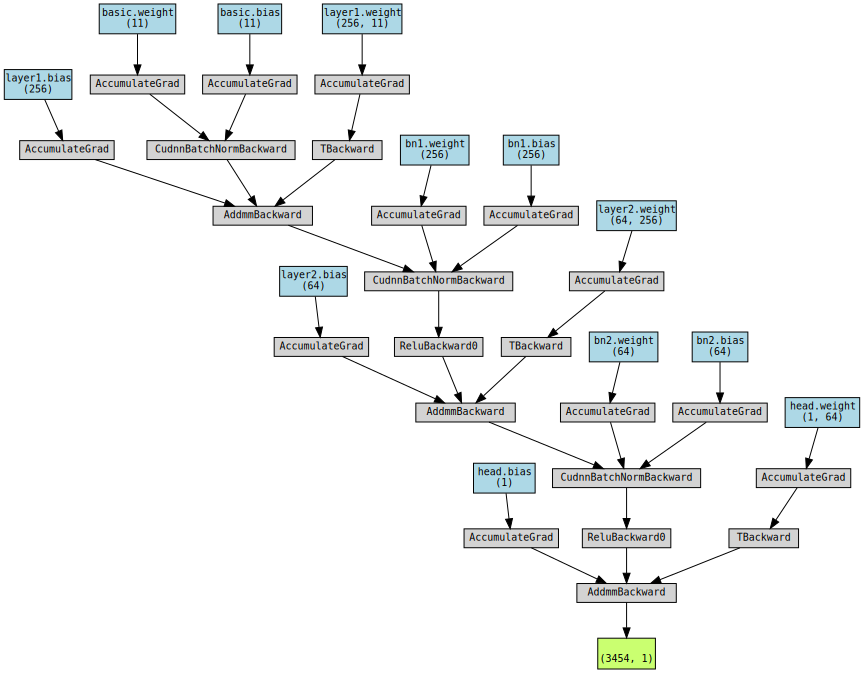

In [28]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [44]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 11]              22
            Linear-2                  [-1, 256]           3,072
       BatchNorm1d-3                  [-1, 256]             512
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
       BatchNorm1d-6                   [-1, 64]             128
           Dropout-7                   [-1, 64]               0
            Linear-8                    [-1, 1]              65
Total params: 20,247
Trainable params: 20,247
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.08
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [36]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
